<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bồn Nước

74.99993319997827


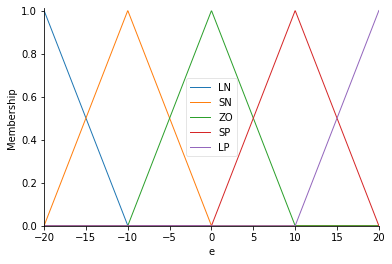

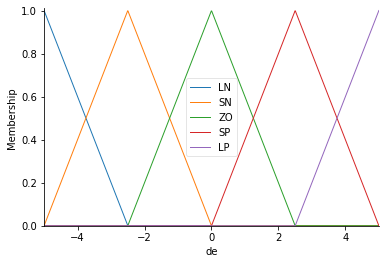

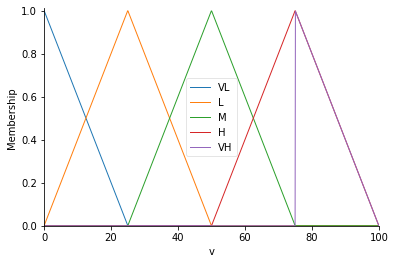

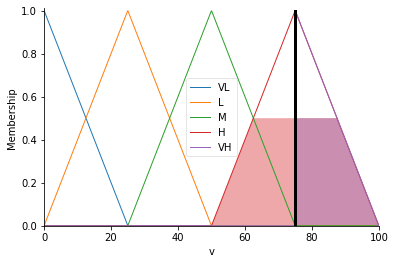

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Input
e  = ctrl.Antecedent(np.linspace(-20, 20, 1000), 'e') # errol
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')  # d(errol)

# Output 
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-20, -20, -10])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-10, 0, 10])
e['SP'] = fuzz.trimf(e.universe,[0, 10, 20])
e['LP'] = fuzz.trimf(e.universe,[10, 20, 20])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  0,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  50])
v['M']  = fuzz.trimf(v.universe,[25, 50,  75])
v['H']  = fuzz.trimf(v.universe,[50, 75, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 75, 100])

# Rules
rule = []


rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))


rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))


#Control system
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

e.view()
de.view()
v.view()



# Compute
valve_simulation.input['e'] = -15
valve_simulation.input['de'] = -2.5

valve_simulation.compute()

print(valve_simulation.output['v'])

# Valve
v.view(sim = valve_simulation)

Bài Nồi cơm điện

65.98290598290603


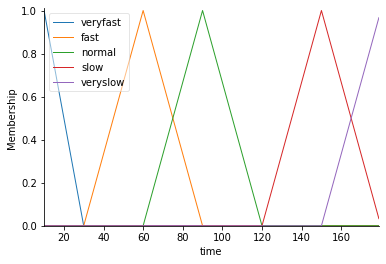

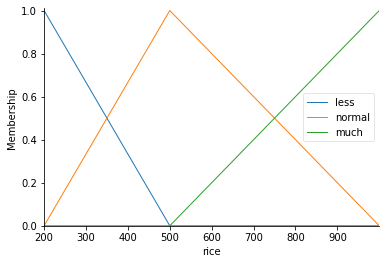

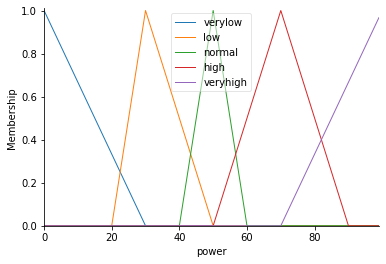

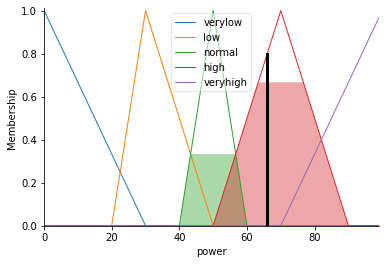

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Nồi cơm điện
time = ctrl.Antecedent(np.arange(10,180,1), 'time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'rice')
power = ctrl.Consequent(np.arange(0,100,1), 'power')
# tao ham cho tung member
time['veryfast'] = fuzz.trimf(time.universe, [10,10,30])
time['fast'] = fuzz.trimf(time.universe, [30,60,90])
time['normal'] = fuzz.trimf(time.universe, [60,90,120])
time['slow'] = fuzz.trimf(time.universe, [120,150,180])
time['veryslow'] = fuzz.trimf(time.universe, [150,180,180])


rice['less'] = fuzz.trimf(rice.universe, [200,200,500])
rice['normal'] = fuzz.trimf(rice.universe, [200,500,1000])
rice['much'] = fuzz.trimf(rice.universe, [500,1000,1000])

power['verylow']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[20,30,50])
power['normal']= fuzz.trimf(power.universe,[40,50,60])
power['high']= fuzz.trimf(power.universe,[50,70,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,100,100])

rule = []

rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['slow'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['normal']))

#Control system
cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

time.view()
rice.view()
power.view()

# Compute
cooker_simulation.input['rice'] = 400
cooker_simulation.input['time'] = 60

cooker_simulation.compute()

print(cooker_simulation.output['power'])

# power
power.view(sim = cooker_simulation)


Medical Diagnosis System

0.44999999999999973


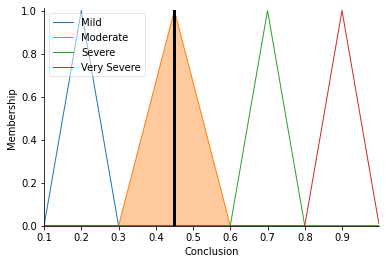

In [ ]:
from skfuzzy import membership
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fuzzyValues = np.arange(0.1, 1.0, 0.001)

# Inputs
fever          = ctrl.Antecedent(fuzzyValues, 'Fever')
headache       = ctrl.Antecedent(fuzzyValues, 'Headache')
nausea         = ctrl.Antecedent(fuzzyValues, 'Nausea')
vomiting       = ctrl.Antecedent(fuzzyValues, 'Vomiting')
jaundice       = ctrl.Antecedent(fuzzyValues, 'Jaundice')
enlargeLiver   = ctrl.Antecedent(fuzzyValues, 'Enlarge Liver')
jointPain      = ctrl.Antecedent(fuzzyValues, 'Joint Pain')
bodyWeakness   = ctrl.Antecedent(fuzzyValues, 'Body Weakness')
dizziness      = ctrl.Antecedent(fuzzyValues, 'Dizziness')
lossOfAppetite = ctrl.Antecedent(fuzzyValues, 'Loss Of Appetite')
MP             = ctrl.Antecedent(fuzzyValues, 'MP')

# Output
conclusion = ctrl.Consequent(fuzzyValues, 'Conclusion')

# Membership
def MembershipFunction(field):
    field['Mild']        = fuzz.trimf(fuzzyValues, [0.1, 0.2, 0.3])
    field['Moderate']    = fuzz.trimf(fuzzyValues, [0.3, 0.45, 0.6])
    field['Severe']      = fuzz.trimf(fuzzyValues, [0.6, 0.7, 0.8])
    field['Very Severe'] = fuzz.trimf(fuzzyValues, [0.8, 0.9, 1.0])
    
  
MembershipFunction(fever)
MembershipFunction(headache)
MembershipFunction(nausea)
MembershipFunction(vomiting)
MembershipFunction(jaundice)
MembershipFunction(enlargeLiver)
MembershipFunction(jointPain)
MembershipFunction(bodyWeakness)
MembershipFunction(dizziness)
MembershipFunction(lossOfAppetite)
MembershipFunction(MP)
MembershipFunction(conclusion)


dict_value = {1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'}
rule = []

def MakeRule(i):
    f1  = dict_value[val_fever[i]]
    f2  = dict_value[val_headache[i]]
    f3  = dict_value[val_nausea[i]]
    f4  = dict_value[val_vomiting[i]]
    f5  = dict_value[val_jaundice[i]]
    f6  = dict_value[val_enlargeLiver[i]]
    f7  = dict_value[val_jointPain[i]]
    f8  = dict_value[val_bodyWeakness[i]]
    f9  = dict_value[val_dizziness[i]]
    f10 = dict_value[val_lossOfAppetite[i]]
    f11 = dict_value[val_MP[i]]

    c   = dict_value[con[i]]

    rule.append(ctrl.Rule(fever[f1] & headache[f2] & nausea[f3] &
        vomiting[f4] & jaundice[f5] & enlargeLiver[f6] & jointPain[f7] &
        bodyWeakness[f8] & dizziness[f9] & lossOfAppetite[f10] & MP[f11], conclusion[c] ))
    
val_fever          = [1,2,3,4,2,1,1,2,2,1,3,2,1,3,1,4,1,2,2,4]
val_headache       = [1,1,2,1,1,2,1,2,1,1,3,3,2,3,1,2,4,4,2,3]
val_nausea         = [1,1,1,1,1,2,2,2,2,2,3,2,2,2,1,1,2,4,2,3]
val_vomiting       = [1,1,1,1,2,1,2,2,2,2,3,3,2,3,2,2,2,1,2,3]
val_jaundice       = [1,1,1,1,1,1,1,2,1,1,3,2,1,3,1,3,1,3,1,3]
val_enlargeLiver   = [1,1,1,1,1,1,1,2,3,2,3,3,1,3,1,2,2,3,1,3]
val_jointPain      = [1,2,1,3,2,1,3,2,2,1,3,2,1,3,1,1,1,2,2,3]
val_bodyWeakness   = [1,2,3,3,2,1,3,2,2,1,4,3,2,3,3,4,2,3,2,3]
val_dizziness      = [3,3,3,1,2,2,2,2,3,1,3,2,1,2,1,3,4,4,2,3]
val_lossOfAppetite = [1,3,3,1,3,1,2,2,2,1,3,1,2,2,3,1,1,4,2,3]
val_MP             = [1,2,2,3,2,1,2,2,2,1,2,2,2,3,2,2,2,3,2,2]

con              = [1,2,3,4,2,1,3,2,2,1,4,3,2,3,3,4,4,4,2,4]

for i in range(20):
    MakeRule(i)

#Control system
conclusion_control = ctrl.ControlSystem(rule)
conclusion_simulation = ctrl.ControlSystemSimulation(conclusion_control)
# Compute
conclusion_simulation.inputs({'Fever': 0.45, 'Headache': 0.2, 'Nausea': 0.2, 
                               'Vomiting': 0.2, 'Jaundice': 0.2,'Enlarge Liver': 0.2,
                               'Joint Pain': 0.45, 'Body Weakness': 0.45, 'Dizziness': 0.7, 'Loss Of Appetite': 0.7, 'MP': 0.45})

conclusion_simulation.compute()
print(conclusion_simulation.output['Conclusion'])

# Conclusion
conclusion.view(sim = conclusion_simulation)

Adaptive food

10.300379985283763


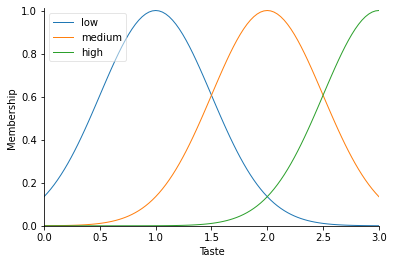

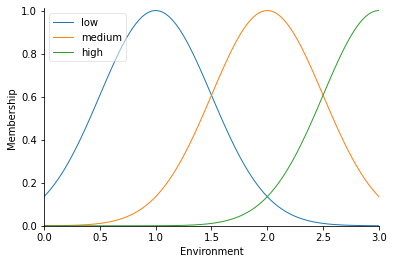

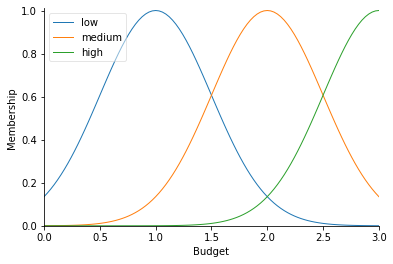

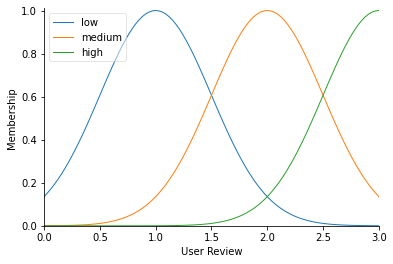

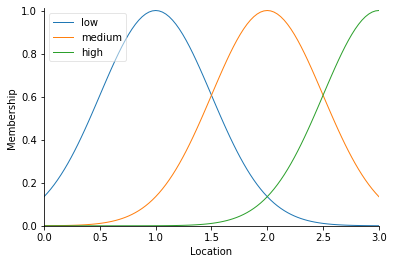

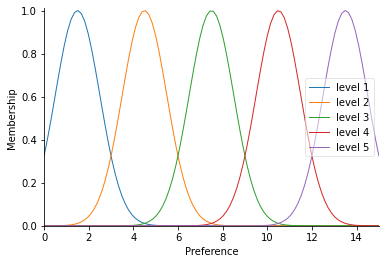

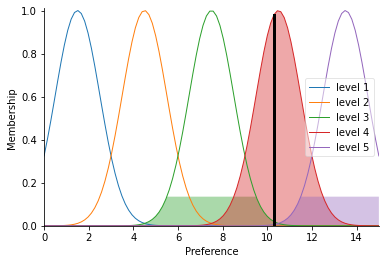

In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
import math

# Input
taste       = ctrl.Antecedent(np.linspace(0, 3, 100), 'Taste')
environment = ctrl.Antecedent(np.linspace(0, 3, 100), 'Environment')
budget      = ctrl.Antecedent(np.linspace(0, 3, 100), 'Budget')
userReview  = ctrl.Antecedent(np.linspace(0, 3, 100), 'User Review')
location    = ctrl.Antecedent(np.linspace(0, 3, 100), 'Location')

# Output

preference = ctrl.Consequent(np.linspace(0, 15, 100), 'Preference')

# membership function
def MembershipFunction(field):
  field['low'] = fuzz.gaussmf(field.universe, 1, 0.5)
  field['medium'] = fuzz.gaussmf(field.universe, 2, 0.5)
  field['high'] = fuzz.gaussmf(field.universe, 3, 0.5)

MembershipFunction(taste)
MembershipFunction(environment)
MembershipFunction(budget)
MembershipFunction(userReview)
MembershipFunction(location)

preference['level 1'] = fuzz.gaussmf(preference.universe, 1.5, 1)
preference['level 2'] = fuzz.gaussmf(preference.universe, 4.5, 1)
preference['level 3'] = fuzz.gaussmf(preference.universe, 7.5, 1)
preference['level 4'] = fuzz.gaussmf(preference.universe, 10.5, 1)
preference['level 5'] = fuzz.gaussmf(preference.universe, 13.5, 1)


taste.view()
environment.view()
budget.view()
userReview.view()
location.view()
preference.view()

dic_input_value = {0: 'low', 1: 'low', 2: 'medium', 3: 'high'}
dic_output_value = {0: 'level 1', 1: 'level 1', 2: 'level 2', 3: 'level 3', 4: 'level 4', 5: 'level 5' }
rule = []
value = [ 1, 2, 3]

for i1 in value:
  for i2 in value:
    for i3 in value:
      for i4 in value:
        for i5 in value:
          lvl = math.ceil(((i1 + i2 + i3 + i4 + i5) / 3))
          rule.append(ctrl.Rule(taste[dic_input_value[i1]] & environment[dic_input_value[i2]] & budget[dic_input_value[i3]] & userReview[dic_input_value[i4]] & location[dic_input_value[i5]], preference[dic_output_value[lvl]]))

preferrence_control = ctrl.ControlSystem(rule)
preference_simulation = ctrl.ControlSystemSimulation(preferrence_control)

# Compute
preference_simulation.input['Taste'] = 3
preference_simulation.input['Environment'] = 2
preference_simulation.input['Budget'] = 2
preference_simulation.input['User Review'] = 3
preference_simulation.input['Location'] = 1

preference_simulation.compute()
print(preference_simulation.output['Preference'])

preference.view(sim = preference_simulation)

